# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [239]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
df = pd.read_csv("data/mini.csv")
df.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

# 결측치 확인
non-null 이 모두 10000 개로 결측치 없음

In [230]:
df.sort_values("user_id")

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
8254,00030dc2,18,28,19.907622,11.373221,10,15,61.765132,2,5,Low,Premium,2,3,0
1061,00058702,12,28,14.201342,25.325044,10,13,84.676719,8,5,Medium,Premium,0,6,1
8486,00076619,3,28,13.692835,6.452196,19,17,78.995991,4,2,High,Basic,2,6,1
3455,000a7fac,10,29,16.608599,94.417871,4,17,75.712102,4,5,Low,Premium,2,3,0
3865,00109fa1,11,24,21.025350,5.188833,19,12,73.553634,4,5,High,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,ffcca840,19,2,15.904005,86.440590,10,14,74.699637,1,5,Low,Premium,3,3,0
8154,ffe5da30,12,12,7.324985,79.807193,15,15,70.224840,3,5,Low,Basic,7,7,1
5181,fff20cbb,6,15,12.768458,48.325353,10,12,69.129113,7,4,Low,Basic,2,5,0
5659,fff3144f,10,1,12.467311,5.454073,10,15,55.267751,5,4,Medium,Premium,2,0,1


# 전체 데이터
* 지난 2년간의 데이터

# user_id
* 8개 문자열 : 순서대로 생성 되었을 가능성 있음
* 하나씩 되어있는 것 각각 다른 유저 

In [232]:
df["user_id"].sort_values()

8254    00030dc2
1061    00058702
8486    00076619
3455    000a7fac
3865    00109fa1
          ...   
6102    ffcca840
8154    ffe5da30
5181    fff20cbb
5659    fff3144f
2738    ffff071d
Name: user_id, Length: 10000, dtype: object

# subscription_duration 
* 사용자가 서비스에 가입한 기간 (월)
* 최소 1 : 이번달 가입자 또는 저번달 가입자
* 최대 23 : 2년간의 데이터로 보여서 저번달 가입자 까지 일 가능성 있음
* 각각의 분포는 크게 차이 나지 않는다.
* 평균 : 11.897400 , std : 6.600896

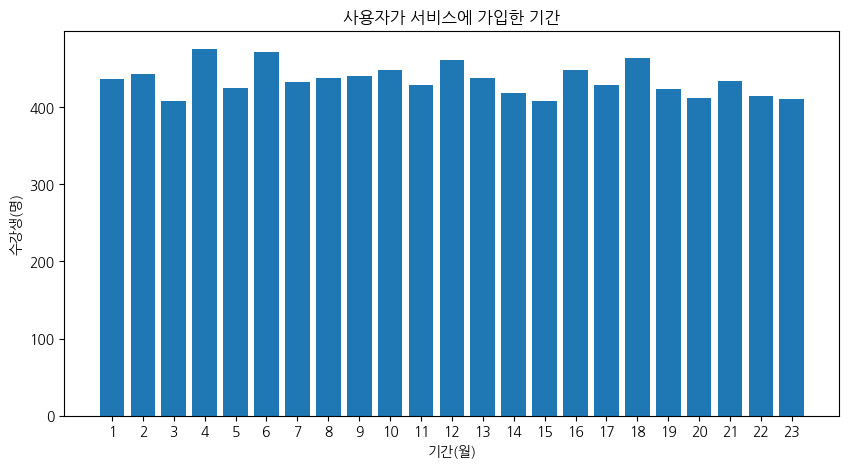

In [246]:
df['subscription_duration'].sort_values()
subscription_duration = df['subscription_duration'].value_counts().sort_index()

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(subscription_duration.index, subscription_duration.values)

#그래프 명
plt.title('사용자가 서비스에 가입한 기간')

#그래프 x축 레이블
plt.xlabel('기간(월)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(subscription_duration.index)

#그래프 출력
plt.show()

# recent_login_time
* 사용자가 마지막으로 로그인한 시간 (일)
* 최소 1 : 어제일 가능성 있음
* 최대 29 : 한달간의 데이터로 보임
* 평균 15.013200 , std : 8.362573
* 각각의 분포는 크게 차이 나지 않는다.

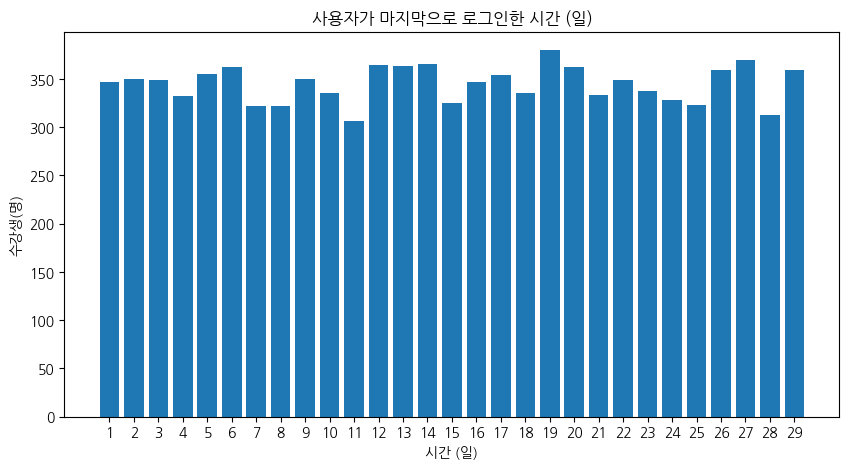

In [250]:
df['recent_login_time'].sort_values()
recent_login_time = df['recent_login_time'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(recent_login_time.index, recent_login_time.values)

#그래프 명
plt.title('사용자가 마지막으로 로그인한 시간 (일)')

#그래프 x축 레이블
plt.xlabel('시간 (일)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(recent_login_time.index)

#그래프 출력
plt.show()

# average_login_time
* 사용자의 일반적인 로그인 시간
* 최소 2.366189 최대 26.998490
* 평균 14.994076 , std 3.001869

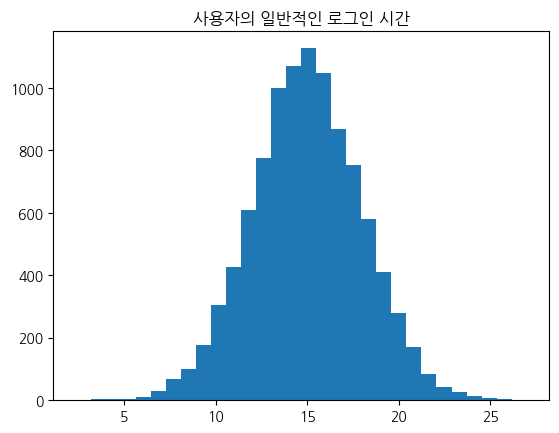

In [274]:
df['average_login_time'].sort_values()
average_login_time = df['average_login_time'].sort_values()

plt.title("사용자의 일반적인 로그인 시간")
plt.hist(average_login_time, bins=30)
plt.show()

# average_time_per_learning_session
* 각 학습 세션에 소요된 평균 시간 (분)
* 0 부터 503분까지
* 평균 54.917720 , std : 56.024310

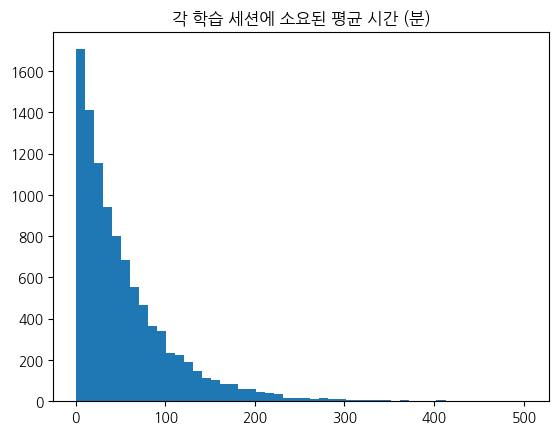

In [293]:
average_time_per_learning_session = df['average_time_per_learning_session'].sort_values()
plt.title("각 학습 세션에 소요된 평균 시간 (분)")
plt.hist(average_time_per_learning_session, bins=50)
plt.show()

# monthly_active_learning_days
* 월간 활동적인 학습 일수
* [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]

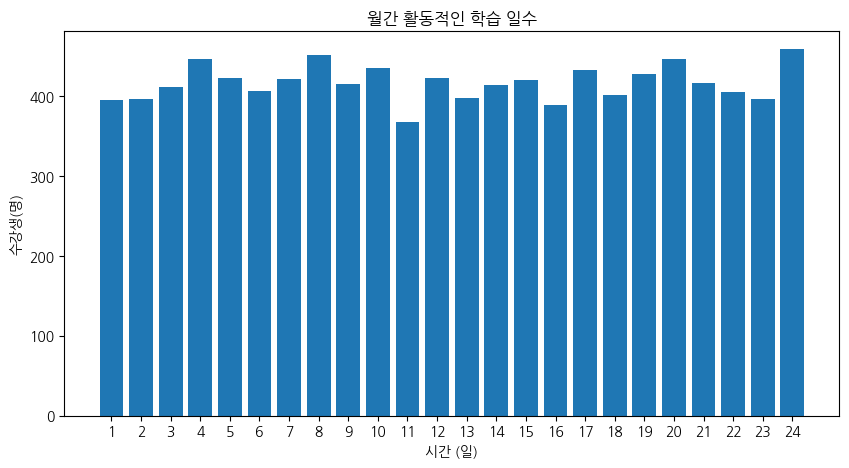

In [301]:
np.sort(df['monthly_active_learning_days'].unique())
monthly_active_learning_days = df['monthly_active_learning_days'].value_counts().sort_index()

#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(monthly_active_learning_days.index, monthly_active_learning_days.values)

#그래프 명
plt.title('월간 활동적인 학습 일수')

#그래프 x축 레이블
plt.xlabel('시간 (일)')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(monthly_active_learning_days.index)

#그래프 출력
plt.show()

# total_completed_courses
* 완료한 총 코스 수
* [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
* 12    1105 에서 제일 큼

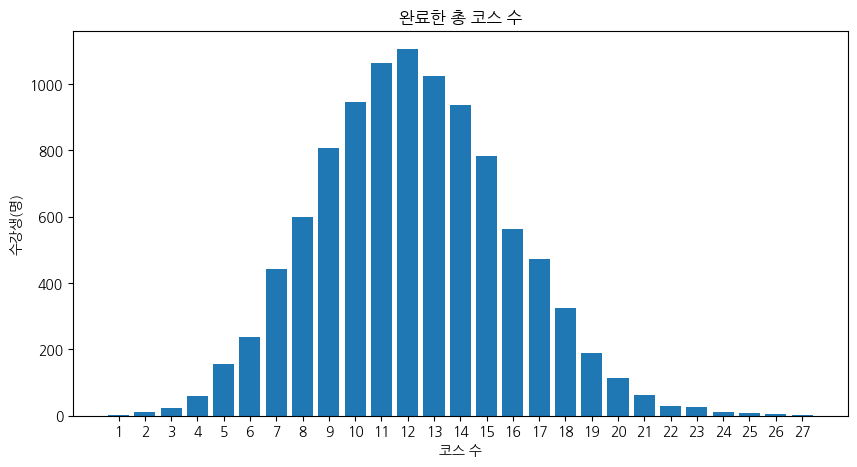

In [306]:
np.sort(df['total_completed_courses'].unique())
total_completed_courses = df['total_completed_courses'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(total_completed_courses.index, total_completed_courses.values)

#그래프 명
plt.title('완료한 총 코스 수')

#그래프 x축 레이블
plt.xlabel('코스 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(total_completed_courses.index)

#그래프 출력
plt.show()

# recent_learning_achievement
* 최근 학습 성취도
* 평균 : 75.029513 , std : 9.968529
* 최대가 100 을 넘는 것으로 보아 이상치인지 확인 필요

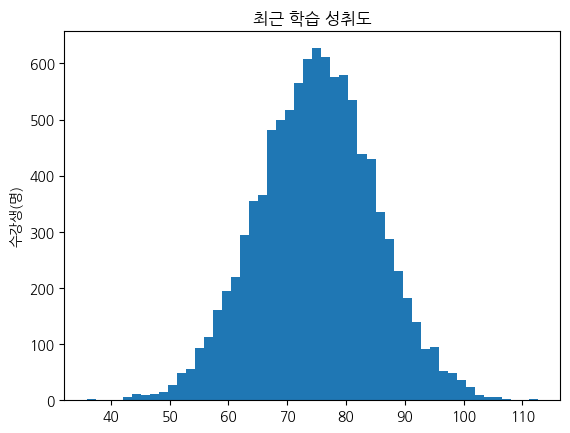

In [317]:
#df[df['recent_learning_achievement'] > 100]
plt.title("최근 학습 성취도")
plt.hist(df['recent_learning_achievement'], bins=50)
#그래프 y축 레이블
plt.ylabel('수강생(명)')
plt.show()


# abandoned_learning_sessions
* 중단된 학습 세션 수
* [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
* 2회에서 빈도 가장 높다. 2226 평균 : 3.043600 , std : 1.755052

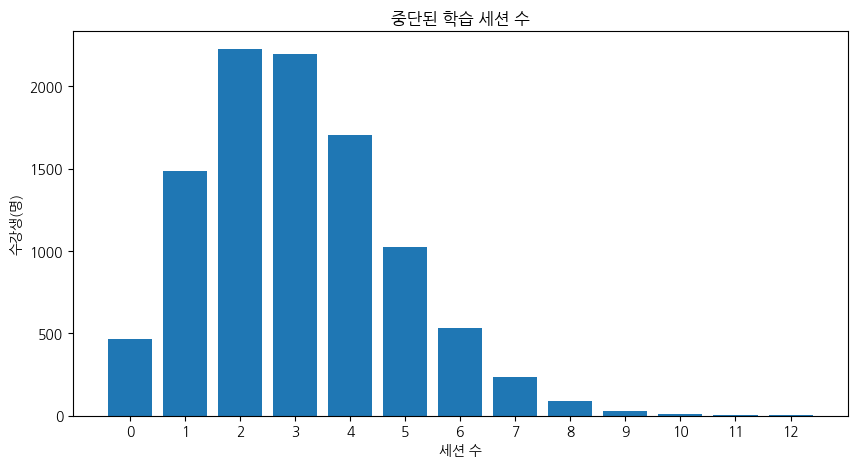

In [324]:
np.sort(df['abandoned_learning_sessions'].unique())
abandoned_learning_sessions=df['abandoned_learning_sessions'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(abandoned_learning_sessions.index, abandoned_learning_sessions.values)

#그래프 명
plt.title('중단된 학습 세션 수')

#그래프 x축 레이블
plt.xlabel('세션 수')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(abandoned_learning_sessions.index)

#그래프 출력
plt.show()

# community_engagement_level
* 커뮤니티 참여도
* [4, 3, 2, 5, 1]
* 참여도가 올라갈 수록 사람이 많다

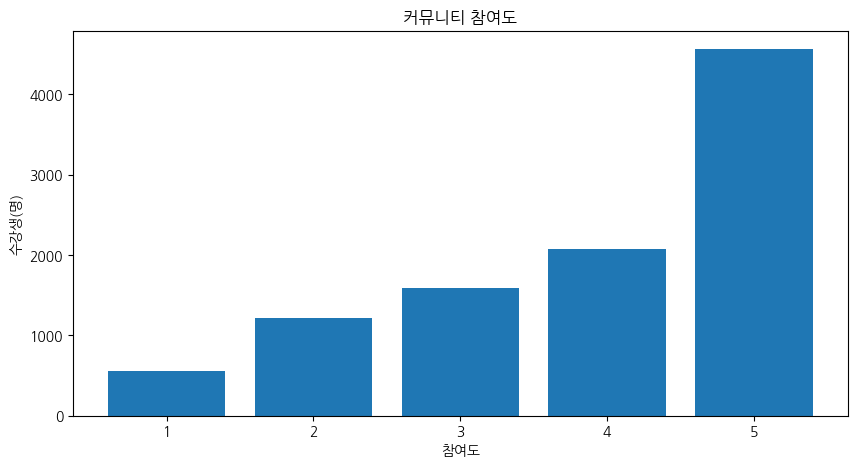

In [333]:
df['community_engagement_level'].unique()
community_engagement_level = df['community_engagement_level'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(community_engagement_level.index, community_engagement_level.values)

#그래프 명
plt.title('커뮤니티 참여도')

#그래프 x축 레이블
plt.xlabel('참여도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(community_engagement_level.index)

#그래프 출력
plt.show()

# preferred_difficulty_level
* 선호하는 난이도
* ['Low', 'Medium', 'High']
* 쉬울수록 더 좋아한다.
* Low : 4992, 
Medium:  300, 
Hi :   2000

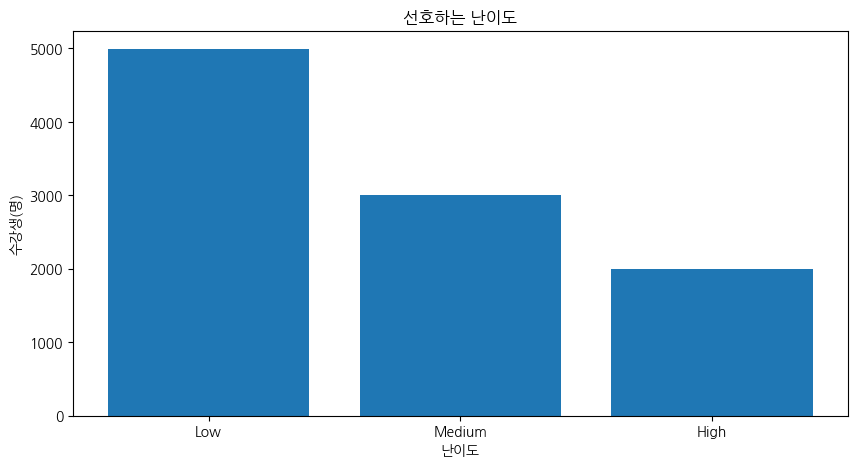

In [343]:
df['preferred_difficulty_level'].unique()
preferred_difficulty_level = df['preferred_difficulty_level'].value_counts()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(preferred_difficulty_level.index, preferred_difficulty_level.values)

#그래프 명
plt.title('선호하는 난이도')

#그래프 x축 레이블
plt.xlabel('난이도')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(preferred_difficulty_level.index)

#그래프 출력
plt.show()

# subscription_type
* 구독 유형
* ['Basic', 'Premium']
* Basic 이 더 많음
* Basic : 5979, 
Premium :   4021

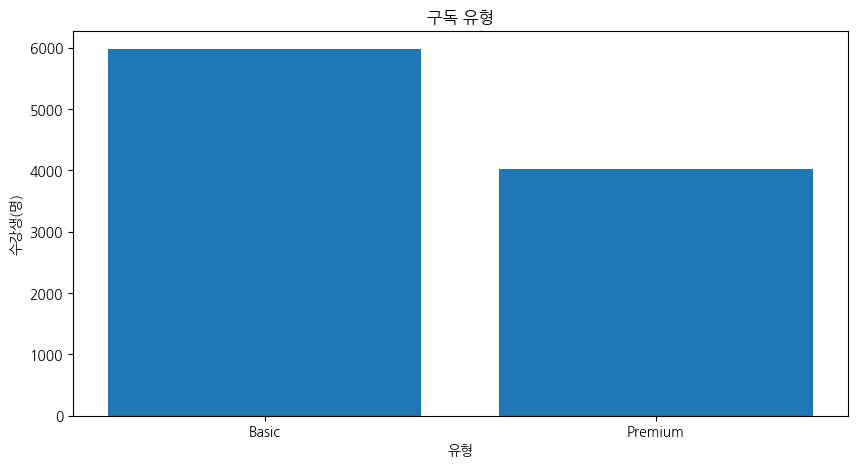

In [285]:
df['subscription_type'].unique()
subscription_type = df['subscription_type'].value_counts()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(subscription_type.index, subscription_type.values)

#그래프 명
plt.title('구독 유형')

#그래프 x축 레이블
plt.xlabel('유형')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(subscription_type.index)

#그래프 출력
plt.show()

# customer_inquiry_history
* 고객 문의 이력
* [ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10]
* 고객 문의가 1회가 제일많고 2회 순으로 점점줄어든다.

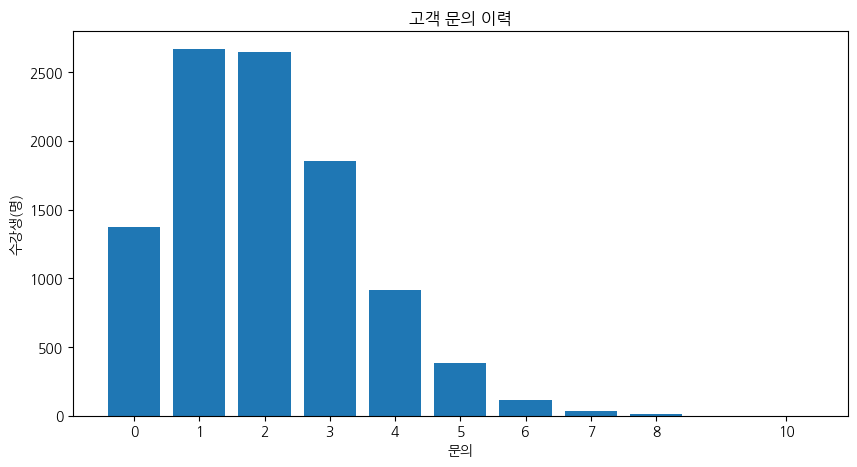

In [352]:
df['customer_inquiry_history'].unique()
customer_inquiry_history = df['customer_inquiry_history'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(customer_inquiry_history.index, customer_inquiry_history.values)

#그래프 명
plt.title('고객 문의 이력')

#그래프 x축 레이블
plt.xlabel('문의')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(customer_inquiry_history.index)

#그래프 출력
plt.show()

# payment_pattern
* 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
  * 7: 3개월 모두 결제함
  * 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
  * 5: 첫 달과 마지막 달에 결제함
  * 4: 첫 달에만 결제함
  * 3: 마지막 2개월에 결제함
  * 2: 가운데 달에만 결제함
  * 1: 마지막 달에만 결제함
  * 0: 3개월 동안 결제하지 않음
* 분포가 거의 비슷하다.

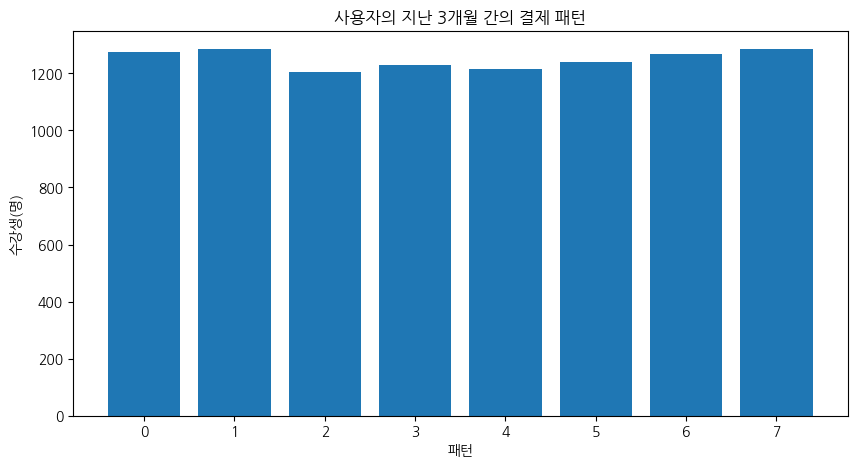

In [360]:
df['payment_pattern'].unique()
payment_pattern = df['payment_pattern'].value_counts().sort_index()
#그래프 사이즈
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(payment_pattern.index, payment_pattern.values)

#그래프 명
plt.title('사용자의 지난 3개월 간의 결제 패턴')

#그래프 x축 레이블
plt.xlabel('패턴')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(payment_pattern.index)

#그래프 출력
plt.show()

# target
* 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄
* 1 :   6199, 
0:   3801

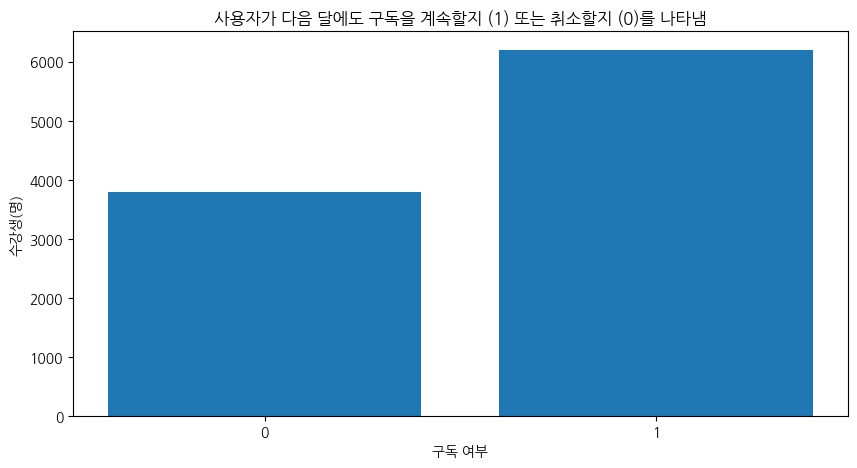

In [376]:
df['target'].unique()
target =df['target'].value_counts().sort_index()

plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.bar(target.index, target.values)

#그래프 명
plt.title('사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄')

#그래프 x축 레이블
plt.xlabel('구독 여부')

#그래프 y축 레이블
plt.ylabel('수강생(명)')

#x축 레이블을
plt.xticks(target.index)

#그래프 출력
plt.show()

# 상관 분석

In [421]:
"subscription_duration	recent_login_time	average_login_time	average_time_per_learning_session	monthly_active_learning_days	total_completed_courses	recent_learning_achievement	abandoned_learning_sessions	community_engagement_level	customer_inquiry_history\tsubscription_type_bool	payment_pattern	target".split("\t")

['subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'customer_inquiry_history',
 'subscription_type',
 'payment_pattern',
 'target']

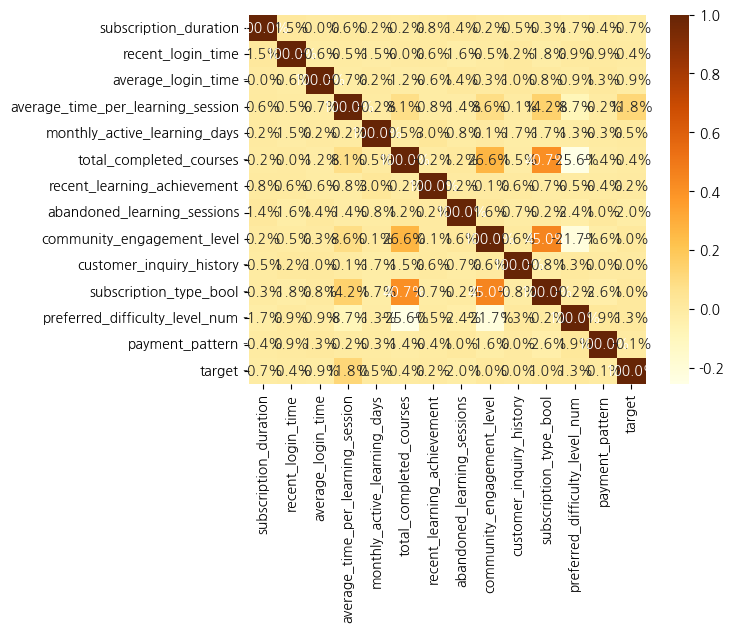

In [436]:
import seaborn as sns
df_c = df["subscription_duration	recent_login_time	average_login_time	average_time_per_learning_session	monthly_active_learning_days	total_completed_courses	recent_learning_achievement	abandoned_learning_sessions	community_engagement_level	customer_inquiry_history\tsubscription_type_bool\tpreferred_difficulty_level_num	payment_pattern	target".split("\t")]
corr=df_c.corr()
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')
plt.show()

# 참여도 와 완주율의 관계가 그나마 높다. 하지만 이것도 거의 연관없어 보임

In [415]:
df['subscription_type_bool'] = df['subscription_type']!='Basic'

In [432]:
df['preferred_difficulty_level_num']=df['preferred_difficulty_level'].apply(lambda x : 0 if x=="Low" else ( 1 if x=="Medium" else 2 ) )

,preferred_difficulty_level_num,preferred_difficulty_level
0,0,Low
1,1,Medium
2,1,Medium
3,0,Low
4,1,Medium
...,...,...
9995,0,Low
9996,1,Medium
9997,2,High
9998,0,Low
